# ML HW1 | Supervised Learning | Neural Net
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

## Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time

## Set directory

In [43]:
directory = "/Users/michaelpecorino/Documents/GitLab/nba/"

## Load inputs

In [44]:
ncaa_all = pd.read_csv(directory + "nba_all.csv")
train = pd.read_csv(directory + "nba_train.csv")
valid = pd.read_csv(directory + "nba_valid.csv")
test = pd.read_csv(directory + "nba_test.csv")

## Define features and response variable

### Features

In [45]:
features = ["game_win_perc_prop", 
            "game_starters_total_minutes_prop", "game_starters_prop_minutes_prop", "game_player_pts_10plus_prop",
            "game_player_pts_15plus_prop", "game_player_pts_16plus_prop", "game_player_pts_17plus_prop",
            "game_player_pts_18plus_prop", "game_player_pts_19plus_prop", "game_player_pts_20plus_prop",
            "game_player_pts_21plus_prop", "game_player_pts_22plus_prop", "game_player_ast_3plus_prop",
            "game_player_ast_5plus_prop", "game_player_ast_7plus_prop",
            "game_player_orb_1plus_prop", "game_player_orb_2plus_prop", "game_player_orb_3plus_prop",
            "game_player_drb_5plus_prop", "game_player_drb_7plus_prop", "game_player_drb_10plus_prop",
            "game_gs_mean_prop", "game_gs_max_prop", "game_pos_prop", "game_pts_prop", "game_efficiency_prop",
            "game_fg_attempted_prop", "game_ft_attempted_prop", "game_ft_made_prop", "game_stl_prop",
            "game_tov_prop","game_stl_tov_ratio_diff", "game_stl_tov_ratio_prop", "game_blk_prop",
            "game_orb_prop", "game_drb_prop", "game_trb_prop", "game_ast_prop", "game_pf_diff", "game_pf_prop",
            "home_indicator", "game_age_mean_prop"]
ncaa_all_features = ncaa_all[features]
train_features = train[features]
valid_features = valid[features]
train_valid_features = train_features.append(valid_features)
test_features = test[features]

### Response variable

In [46]:
response_variable = "win_indicator"
ncaa_all_response = ncaa_all[response_variable]
train_response = train[response_variable]
valid_response = valid[response_variable]
train_valid_resposnse = train_response.append(valid_response)
test_response = test[response_variable]

## Neural Network

### Grid search

In [47]:
folds = set(train['fold'])
folds

{1, 2, 3, 4, 5}

In [7]:
neural_network_results = pd.DataFrame(columns = ['hidden_layer_size', 'solver', 'activation', 'alpha',
                                                 'fold', 'in_fold_accuracy', 'out_fold_accuracy'
                                                 ])

hidden_layer_sizes = [250, 500, 750, 1000, 1250, 1500]
alphas = [.01, .02, .05, .1]

for alpha in alphas:
    for hidden_layer_size in hidden_layer_sizes:
        for solver in ["adam"]:
            for activation in ["relu"]:
                for fold in folds:
        
                    #Debugging
                    #alpha = .01
                    #hidden_layer_size = 250
                    #solver = "adam"
                    #activation = "relu"
                    #fold = 1

                    train_features_in_fold = train[train["fold"] != fold][features]
                    train_response_in_fold = train[train["fold"] != fold][response_variable]

                    test_features_out_fold = train[train["fold"] == fold][features]
                    test_response_out_fold = train[train["fold"] == fold][response_variable]

                    print("Modeling fold", fold, "with:",
                          hidden_layer_size, "hidden layers, ",
                          alpha, "regularization, ",
                          solver, "solver, and ",
                          activation, "activation")

                    neural_network = MLPClassifier(solver = solver, #lbfgs, adam, sgd
                                                   activation = activation, #identity, logistic, tanh, relu
                                                   alpha = alpha,
                                                   hidden_layer_sizes = (hidden_layer_size,),
                                                   batch_size = 'auto',
                                                   learning_rate = 'constant',
                                                   learning_rate_init = 0.001,
                                                   power_t = 0.5,
                                                   max_iter = 200,
                                                   shuffle = True,
                                                   random_state = 28,
                                                   tol = 0.0001,
                                                   verbose = False,
                                                   warm_start = False,
                                                   momentum = 0.9,
                                                   nesterovs_momentum = True,
                                                   early_stopping = True,
                                                   validation_fraction = 0.1,
                                                   beta_1 = 0.9,
                                                   beta_2 = 0.999,
                                                   epsilon = 1e-08,
                                                   n_iter_no_change = 10,
                                                   max_fun = 15000)

                    neural_network.fit(train_features_in_fold, train_response_in_fold) 

                    in_fold_accuracy = neural_network.score(train_features_in_fold, train_response_in_fold)
                    out_fold_accuracy = neural_network.score(test_features_out_fold, test_response_out_fold)

                    neural_network_results = neural_network_results.append({'hidden_layer_size': hidden_layer_size,
                                                                            'solver': solver,
                                                                            'activation': activation,
                                                                            'alpha': alpha,
                                                                            'fold': fold,
                                                                            'in_fold_accuracy': in_fold_accuracy,
                                                                            'out_fold_accuracy': out_fold_accuracy},
                                                                          ignore_index = True)
                    print(neural_network_results, "\n")

Modeling fold 1 with: 250 hidden layers,  0.01 regularization,  adam solver, and  relu activation
  hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0               250   adam       relu   0.01    1          0.682227   

   out_fold_accuracy  
0           0.696133   

Modeling fold 2 with: 250 hidden layers,  0.01 regularization,  adam solver, and  relu activation
  hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0               250   adam       relu   0.01    1          0.682227   
1               250   adam       relu   0.01    2          0.683028   

   out_fold_accuracy  
0           0.696133  
1           0.656985   

Modeling fold 3 with: 250 hidden layers,  0.01 regularization,  adam solver, and  relu activation
  hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0               250   adam       relu   0.01    1          0.682227   
1               250   adam       relu   0.01    2          0.683028   
2               2

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   

    out_fold_accuracy  
0            0.696133  
1            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
5                500   adam       relu   0.01    1          0.665629   
6                500   adam       relu   0.01    2          0.692015   
7                500   adam       relu   0.01    3          0.689941   
8                500   adam       relu   0.01    4          0.683028   
9                500   adam       relu   0.01    5          0.676115   
10               750   adam       relu   0.01    1          0.686722   
11               750   adam       relu   0.01    2          0.685448   
12               750   adam       relu   0.01    3          0.69

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
..               ...    ...        ...    ...  ...               ...   
56              1500   adam       relu   0.02    2          0.691324   
57              1500   adam       relu   0.02    3          0.695472   
58              1500   adam       relu   0.02    4          0.674041   
59              1500   adam       relu   0.02    5          0.680263   
60               250   adam       relu   0.05    1          0.688451   

    out_fold_accuracy  
0            0.696133  
1            0.656985  
2            0.627939  
3            0.706777  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
..               ...    ...        ...    ...  ...               ...   
63               250   adam       relu   0.05    4          0.676115   
64               250   adam       relu   0.05    5          0.671275   
65               500   adam       relu   0.05    1          0.684993   
66               500   adam       relu   0.05    2          0.685102   
67               500   adam       relu   0.05    3          0.688213   

    out_fold_accuracy  
0            0.696133  
1            0.656985  
2            0.627939  
3            0.706777  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
..               ...    ...        ...    ...  ...               ...   
70               750   adam       relu   0.05    1          0.689834   
71               750   adam       relu   0.05    2          0.680608   
72               750   adam       relu   0.05    3          0.686139   
73               750   adam       relu   0.05    4          0.673349   
74               750   adam       relu   0.05    5          0.689250   

    out_fold_accuracy  
0            0.696133  
1            0.656985  
2            0.627939  
3            0.706777  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
..               ...    ...        ...    ...  ...               ...   
77              1000   adam       relu   0.05    3          0.698928   
78              1000   adam       relu   0.05    4          0.666782   
79              1000   adam       relu   0.05    5          0.692361   
80              1250   adam       relu   0.05    1          0.682227   
81              1250   adam       relu   0.05    2          0.689250   

    out_fold_accuracy  
0            0.696133  
1            0.656985  
2            0.627939  
3            0.706777  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
..               ...    ...        ...    ...  ...               ...   
84              1250   adam       relu   0.05    5          0.684411   
85              1500   adam       relu   0.05    1          0.672891   
86              1500   adam       relu   0.05    2          0.692707   
87              1500   adam       relu   0.05    3          0.692707   
88              1500   adam       relu   0.05    4          0.684411   

    out_fold_accuracy  
0            0.696133  
1            0.656985  
2            0.627939  
3            0.706777  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.682227   
1                250   adam       relu   0.01    2          0.683028   
2                250   adam       relu   0.01    3          0.678189   
3                250   adam       relu   0.01    4          0.678534   
4                250   adam       relu   0.01    5          0.674386   
..               ...    ...        ...    ...  ...               ...   
91               250   adam       relu   0.10    2          0.680608   
92               250   adam       relu   0.10    3          0.704459   
93               250   adam       relu   0.10    4          0.677497   
94               250   adam       relu   0.10    5          0.686139   
95               500   adam       relu   0.10    1          0.655947   

    out_fold_accuracy  
0            0.696133  
1            0.656985  
2            0.627939  
3            0.706777  
4            0.

    hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                 250   adam       relu   0.01    1          0.682227   
1                 250   adam       relu   0.01    2          0.683028   
2                 250   adam       relu   0.01    3          0.678189   
3                 250   adam       relu   0.01    4          0.678534   
4                 250   adam       relu   0.01    5          0.674386   
..                ...    ...        ...    ...  ...               ...   
98                500   adam       relu   0.10    4          0.661943   
99                500   adam       relu   0.10    5          0.671275   
100               750   adam       relu   0.10    1          0.697441   
101               750   adam       relu   0.10    2          0.679226   
102               750   adam       relu   0.10    3          0.688904   

     out_fold_accuracy  
0             0.696133  
1             0.656985  
2             0.627939  
3             0.706777 

    hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                 250   adam       relu   0.01    1          0.682227   
1                 250   adam       relu   0.01    2          0.683028   
2                 250   adam       relu   0.01    3          0.678189   
3                 250   adam       relu   0.01    4          0.678534   
4                 250   adam       relu   0.01    5          0.674386   
..                ...    ...        ...    ...  ...               ...   
105              1000   adam       relu   0.10    1          0.685685   
106              1000   adam       relu   0.10    2          0.694435   
107              1000   adam       relu   0.10    3          0.697891   
108              1000   adam       relu   0.10    4          0.683719   
109              1000   adam       relu   0.10    5          0.695126   

     out_fold_accuracy  
0             0.696133  
1             0.656985  
2             0.627939  
3             0.706777 

    hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                 250   adam       relu   0.01    1          0.682227   
1                 250   adam       relu   0.01    2          0.683028   
2                 250   adam       relu   0.01    3          0.678189   
3                 250   adam       relu   0.01    4          0.678534   
4                 250   adam       relu   0.01    5          0.674386   
..                ...    ...        ...    ...  ...               ...   
112              1250   adam       relu   0.10    3          0.698928   
113              1250   adam       relu   0.10    4          0.681991   
114              1250   adam       relu   0.10    5          0.686485   
115              1500   adam       relu   0.10    1          0.666667   
116              1500   adam       relu   0.10    2          0.692361   

     out_fold_accuracy  
0             0.696133  
1             0.656985  
2             0.627939  
3             0.706777 

### Output

In [8]:
neural_network_results = neural_network_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
neural_network_results.to_csv(directory + "neural_net_grid_search.csv")
neural_network_results

,hidden_layer_size,solver,activation,alpha,fold,in_fold_accuracy,out_fold_accuracy
33,250,adam,relu,0.02,4,0.677152,0.709544
3,250,adam,relu,0.01,4,0.678534,0.706777
93,250,adam,relu,0.10,4,0.677497,0.706777
28,1500,adam,relu,0.01,4,0.676115,0.705394
58,1500,adam,relu,0.02,4,0.674041,0.705394
...,...,...,...,...,...,...,...
112,1250,adam,relu,0.10,3,0.698928,0.629322
52,1250,adam,relu,0.02,3,0.699965,0.629322
32,250,adam,relu,0.02,3,0.677497,0.627939
62,250,adam,relu,0.05,3,0.677497,0.627939


### Get mean accuracy across the folds

In [48]:
neural_network_results = pd.read_csv(directory + "neural_net_grid_search.csv")
neural_network_results

,Unnamed: 0,hidden_layer_size,solver,activation,alpha,fold,in_fold_accuracy,out_fold_accuracy
0,33,250,adam,relu,0.02,4,0.677152,0.709544
1,3,250,adam,relu,0.01,4,0.678534,0.706777
2,93,250,adam,relu,0.10,4,0.677497,0.706777
3,28,1500,adam,relu,0.01,4,0.676115,0.705394
4,58,1500,adam,relu,0.02,4,0.674041,0.705394
...,...,...,...,...,...,...,...,...
115,112,1250,adam,relu,0.10,3,0.698928,0.629322
116,52,1250,adam,relu,0.02,3,0.699965,0.629322
117,32,250,adam,relu,0.02,3,0.677497,0.627939
118,62,250,adam,relu,0.05,3,0.677497,0.627939


In [49]:
in_fold_cv_summary = neural_network_results.groupby(['hidden_layer_size', 'solver', 'activation', 'alpha'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = neural_network_results.groupby(['hidden_layer_size', 'solver', 'activation', 'alpha'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                                               mean
hidden_layer_size solver activation alpha          
1500              adam   relu       0.10   0.681970
750               adam   relu       0.02   0.681411
                                    0.01   0.680859
                                    0.05   0.680859
1500              adam   relu       0.02   0.680311
                                    0.05   0.680034
250               adam   relu       0.10   0.680028
1000              adam   relu       0.10   0.679752
1500              adam   relu       0.01   0.679481
750               adam   relu       0.10   0.679474
1000              adam   relu       0.02   0.679473
                                    0.01   0.675324
1250              adam   relu       0.10   0.673944
250               adam   relu       0.02   0.673389
1250              adam   relu       0.01   0.672559
250               adam   relu       0.05   0.671729
1250              adam   relu       0.05   0.671180
250         

### Get the optimal hyperparameters

In [50]:
hidden_layer_size_opt = 1500
solver_opt = "adam"
activation_opt = "relu"
alpha_opt = .1

### Train a final model with the optimal hyperparameters

In [51]:
neural_network_final = MLPClassifier(solver = solver_opt,
                                     activation = activation_opt,
                                     alpha = alpha_opt,
                                     hidden_layer_sizes = (hidden_layer_size_opt,),
                                     batch_size = 'auto',
                                     learning_rate = 'constant',
                                     learning_rate_init = 0.001,
                                     power_t = 0.5,
                                     max_iter = 200,
                                     shuffle = True,
                                     random_state = 28,
                                     tol = 0.0001,
                                     verbose = False,
                                     warm_start = False,
                                     momentum = 0.9,
                                     nesterovs_momentum = True,
                                     early_stopping = True,
                                     validation_fraction = 0.1,
                                     beta_1 = 0.9,
                                     beta_2 = 0.999,
                                     epsilon = 1e-08,
                                     n_iter_no_change = 10,
                                     max_fun = 15000)

neural_network_final.fit(train_features, train_response) 

print("Neural Network accuracy on training data: ",
      neural_network_final.score(train_features, train_response))
print("Neural Network accuracy on validation data: ",
      neural_network_final.score(valid_features, valid_response))
print("Neural Network accuracy on test data: ",
      neural_network_final.score(test_features, test_response))

Neural Network accuracy on training data:  0.6819690265486725
Neural Network accuracy on validation data:  0.6830213040671401
Neural Network accuracy on test data:  0.6734417344173442


## Learning curve

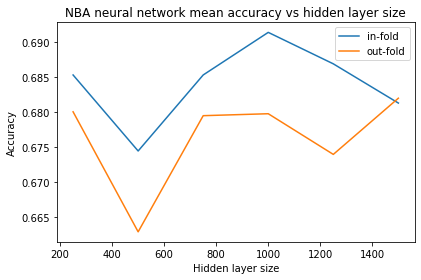

In [52]:
in_fold_hls_summary =  neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                              (neural_network_results['activation'] == activation_opt) &
                                              (neural_network_results['alpha'] == alpha_opt)].groupby(['hidden_layer_size'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['hidden_layer_size'], ascending = True)
out_fold_hls_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                              (neural_network_results['activation'] == activation_opt) &
                                              (neural_network_results['alpha'] == alpha_opt)].groupby(['hidden_layer_size'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['hidden_layer_size'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Hidden layer size")
ax.set_ylabel("Accuracy")
ax.set_title("NBA neural network mean accuracy vs hidden layer size")
ax.plot(hidden_layer_sizes,
        in_fold_hls_summary['mean'],
        label = "in-fold")
ax.plot(hidden_layer_sizes,
        out_fold_hls_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

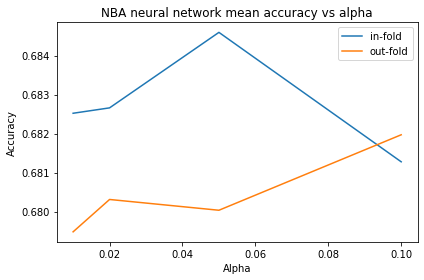

In [53]:
in_fold_alpha_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                               (neural_network_results['activation'] == activation_opt) &
                                               (neural_network_results['hidden_layer_size'] == hidden_layer_size_opt)].groupby(['alpha'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['alpha'], ascending = True)
out_fold_alpha_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                                (neural_network_results['activation'] == activation_opt) &
                                                (neural_network_results['hidden_layer_size'] == hidden_layer_size_opt)].groupby(['alpha'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['alpha'], ascending = True)


fig, ax = plt.subplots()

ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("NBA neural network mean accuracy vs alpha")
ax.plot(alphas,
        in_fold_alpha_summary['mean'],
        label = "in-fold")
ax.plot(alphas,
        out_fold_alpha_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

In [54]:
neural_network_train_sizes = []
neural_network_train_size_train_scores = []
neural_network_train_size_test_scores = []
neural_network_train_size_train_time = []
neural_network_train_size_score_time = []

iter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter = iter + 1
    print("iter:", iter,
          " | train size:", train_size)
    neural_network_train_size = MLPClassifier(solver = solver_opt, #lbfgs, adam, sgd
                                                   activation = activation_opt, #identity, logistic, tanh, relu
                                                   alpha = alpha_opt,
                                                   hidden_layer_sizes = (hidden_layer_size_opt,),
                                                   batch_size = 'auto',
                                                   learning_rate = 'constant',
                                                   learning_rate_init = 0.001,
                                                   power_t = 0.5,
                                                   max_iter = 200,
                                                   shuffle = True,
                                                   random_state = 28,
                                                   tol = 0.0001,
                                                   verbose = False,
                                                   warm_start = False,
                                                   momentum = 0.9,
                                                   nesterovs_momentum = True,
                                                   early_stopping = True,
                                                   validation_fraction = 0.1,
                                                   beta_1 = 0.9,
                                                   beta_2 = 0.999,
                                                   epsilon = 1e-08,
                                                   n_iter_no_change = 10,
                                                   max_fun = 15000)
    
    start = time.time()
    neural_network_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    neural_network_train_size_train_time.append(end - start)

    neural_network_train_sizes.append(neural_network_train_size)
    
    start = time.time()
    neural_network_train_size_train_scores.append(neural_network_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    neural_network_train_size_score_time.append(end - start)

    neural_network_train_size_test_scores.append(neural_network_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

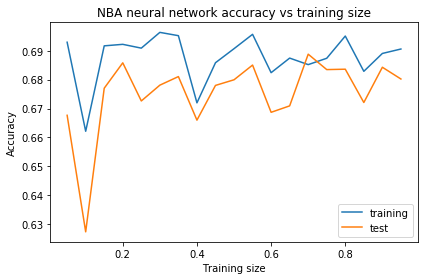

In [58]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Accuracy")
ax.set_title("NBA neural network accuracy vs training size")
ax.plot(train_sizes, neural_network_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, neural_network_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

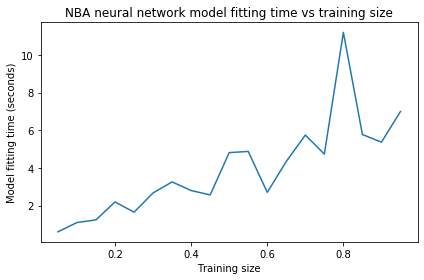

In [59]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("NBA neural network model fitting time vs training size")
ax.plot(train_sizes, neural_network_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

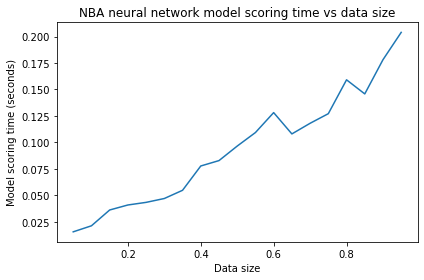

In [60]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("NBA neural network model scoring time vs data size")
ax.plot(train_sizes, neural_network_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()